# IF3170 Artificial Intelligence | Tugas Besar 2



Group Number: 05

Group Members:
- Name (NIM)
- Name (NIM)
- Name (NIM)
- Name (NIM)
- Name (NIM)

## Import Libraries

In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Set random seed for reproducibility
np.random.seed(42)

# Set seaborn theme for better visualizations
sns.set_theme(style="whitegrid")

# Import custom models from src
import sys
sys.path.append('./src')

# Import our from-scratch implementations
from dtl import ID3Classifier, C45Classifier, CARTClassifier
from logistic_regression import LogisticRegressionScratch
from svm import SVMOneVsAll, SVMOneVsOne, SVMDAG

# Import feature engineering utilities
from feature_engineering import CompleteFeatureEngineer

print("All libraries and custom models imported successfully!")
print(f"Random seed: 42")
print(f"Available DTL algorithms: ID3, C4.5, CART")
print(f"Available SVM strategies: OneVsAll, OneVsOne, DAGSVM")

All libraries and custom models imported successfully!
Random seed: 42
Available DTL algorithms: ID3, C4.5, CART
Available SVM strategies: OneVsAll, OneVsOne, DAGSVM


In [ ]:
# Reload modules to pick up any code changes
import importlib

# Reload custom modules
import dtl
import logistic_regression
import svm
import feature_engineering

importlib.reload(dtl)
importlib.reload(logistic_regression)
importlib.reload(svm)
importlib.reload(feature_engineering)

# Re-import classes after reload
from dtl import ID3Classifier, C45Classifier, CARTClassifier
from logistic_regression import LogisticRegressionScratch
from svm import SVMOneVsAll, SVMOneVsOne, SVMDAG
from feature_engineering import CompleteFeatureEngineer

print("All modules reloaded successfully!")
print("Code changes have been applied!")

✅ All modules reloaded successfully!
✅ Code changes have been applied!


## Import Dataset

In [236]:
# Load dataset from local files
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

print(f"Training set shape: {train_df.shape}")
print(f"Test set shape: {test_df.shape}")

Training set shape: (3096, 38)
Test set shape: (1328, 37)


# Exploratory Data Analysis (Optional)

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis.

In [237]:
# Initial data inspection
print("=== Training Data Info ===")
display(train_df.head())
print(f"\nShape: {train_df.shape}")
print(f"\nData types:\n{train_df.dtypes}")
print(f"\nMissing values:\n{train_df.isnull().sum()}")
print(f"\nDuplicate rows: {train_df.duplicated().sum()}")

=== Training Data Info ===


,Student_ID,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,3743,1,17,1,9670,1,1,118.0,1,19,...,0,6,6,6,14.000000,0,12.4,0.5,1.79,Graduate
1,3540,1,1,1,9070,1,1,139.0,1,1,...,0,6,7,6,12.166667,1,16.2,0.3,-0.92,Graduate
2,1118,1,1,1,9500,1,1,138.0,1,38,...,0,8,8,7,13.571429,0,13.9,-0.3,0.79,Graduate
3,791,1,17,1,9773,1,1,138.0,1,1,...,0,6,6,6,13.833333,0,11.1,0.6,2.02,Graduate
4,4381,1,7,1,9500,1,2,140.0,1,38,...,0,8,14,4,11.325000,1,12.7,3.7,-1.70,Dropout



Shape: (3096, 38)

Data types:
Student_ID                                          int64
Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                  

,Student_ID,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.00000,3096.000000,3096.000000,3096.000000,3096.000000,...,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1546
mean,2201.759690,1.166021,18.372416,1.717700,8832.330749,0.89438,4.672804,132.762435,1.797158,19.361111,...,0.539729,6.201227,8.015181,4.410853,10.179772,0.141150,11.580749,1.209076,0.006570,NaN
std,1275.008676,0.573701,17.456612,1.292362,2116.515003,0.30740,10.387415,13.137942,6.781964,15.568871,...,1.906634,2.223507,3.966593,3.022767,5.260617,0.718398,2.659685,1.380070,2.268175,NaN
min,1.000000,1.000000,1.000000,0.000000,33.000000,0.00000,1.000000,95.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1102.750000,1.000000,1.000000,1.000000,9085.000000,1.00000,1.000000,125.000000,1.000000,2.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,2212.000000,1.000000,17.000000,1.000000,9238.000000,1.00000,1.000000,133.100000,1.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,3303.750000,1.000000,39.000000,2.000000,9556.000000,1.00000,1.000000,140.000000,1.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN



=== Target Distribution ===
Target
Graduate    1546
Dropout      994
Enrolled     556
Name: count, dtype: int64


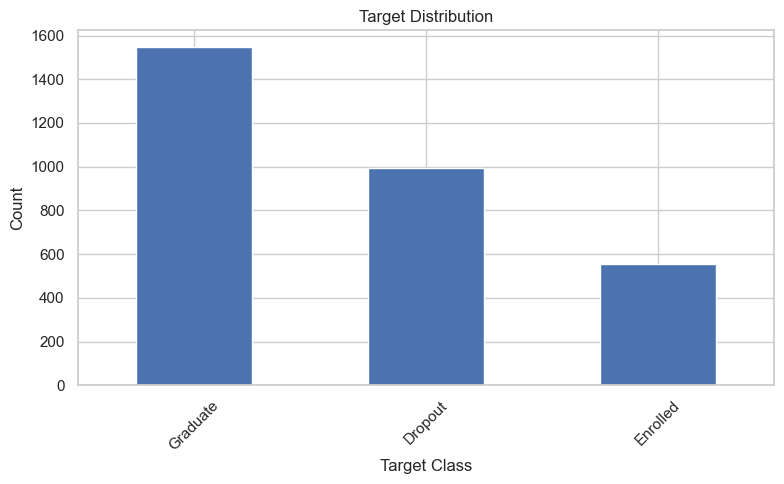

In [238]:
# Statistical summary
display(train_df.describe(include='all'))

# Check target distribution
if 'Target' in train_df.columns:
    print("\n=== Target Distribution ===")
    print(train_df['Target'].value_counts())
    
    # Visualize target distribution
    plt.figure(figsize=(8, 5))
    train_df['Target'].value_counts().plot(kind='bar')
    plt.title('Target Distribution')
    plt.xlabel('Target Class')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

/home/sayyaku/Documents/0 Kuliah/Inteligensi Artifisial/Akal-Imitasi/.venv/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.draw()
/home/sayyaku/Documents/0 Kuliah/Inteligensi Artifisial/Akal-Imitasi/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


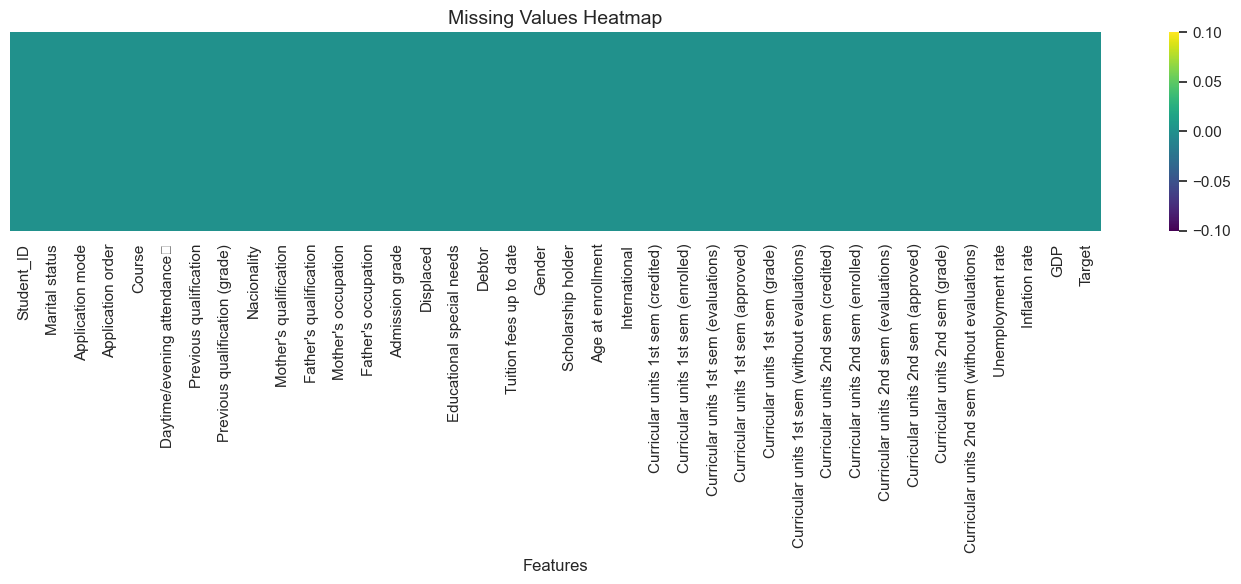

/tmp/ipykernel_80581/491512202.py:38: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  plt.tight_layout()


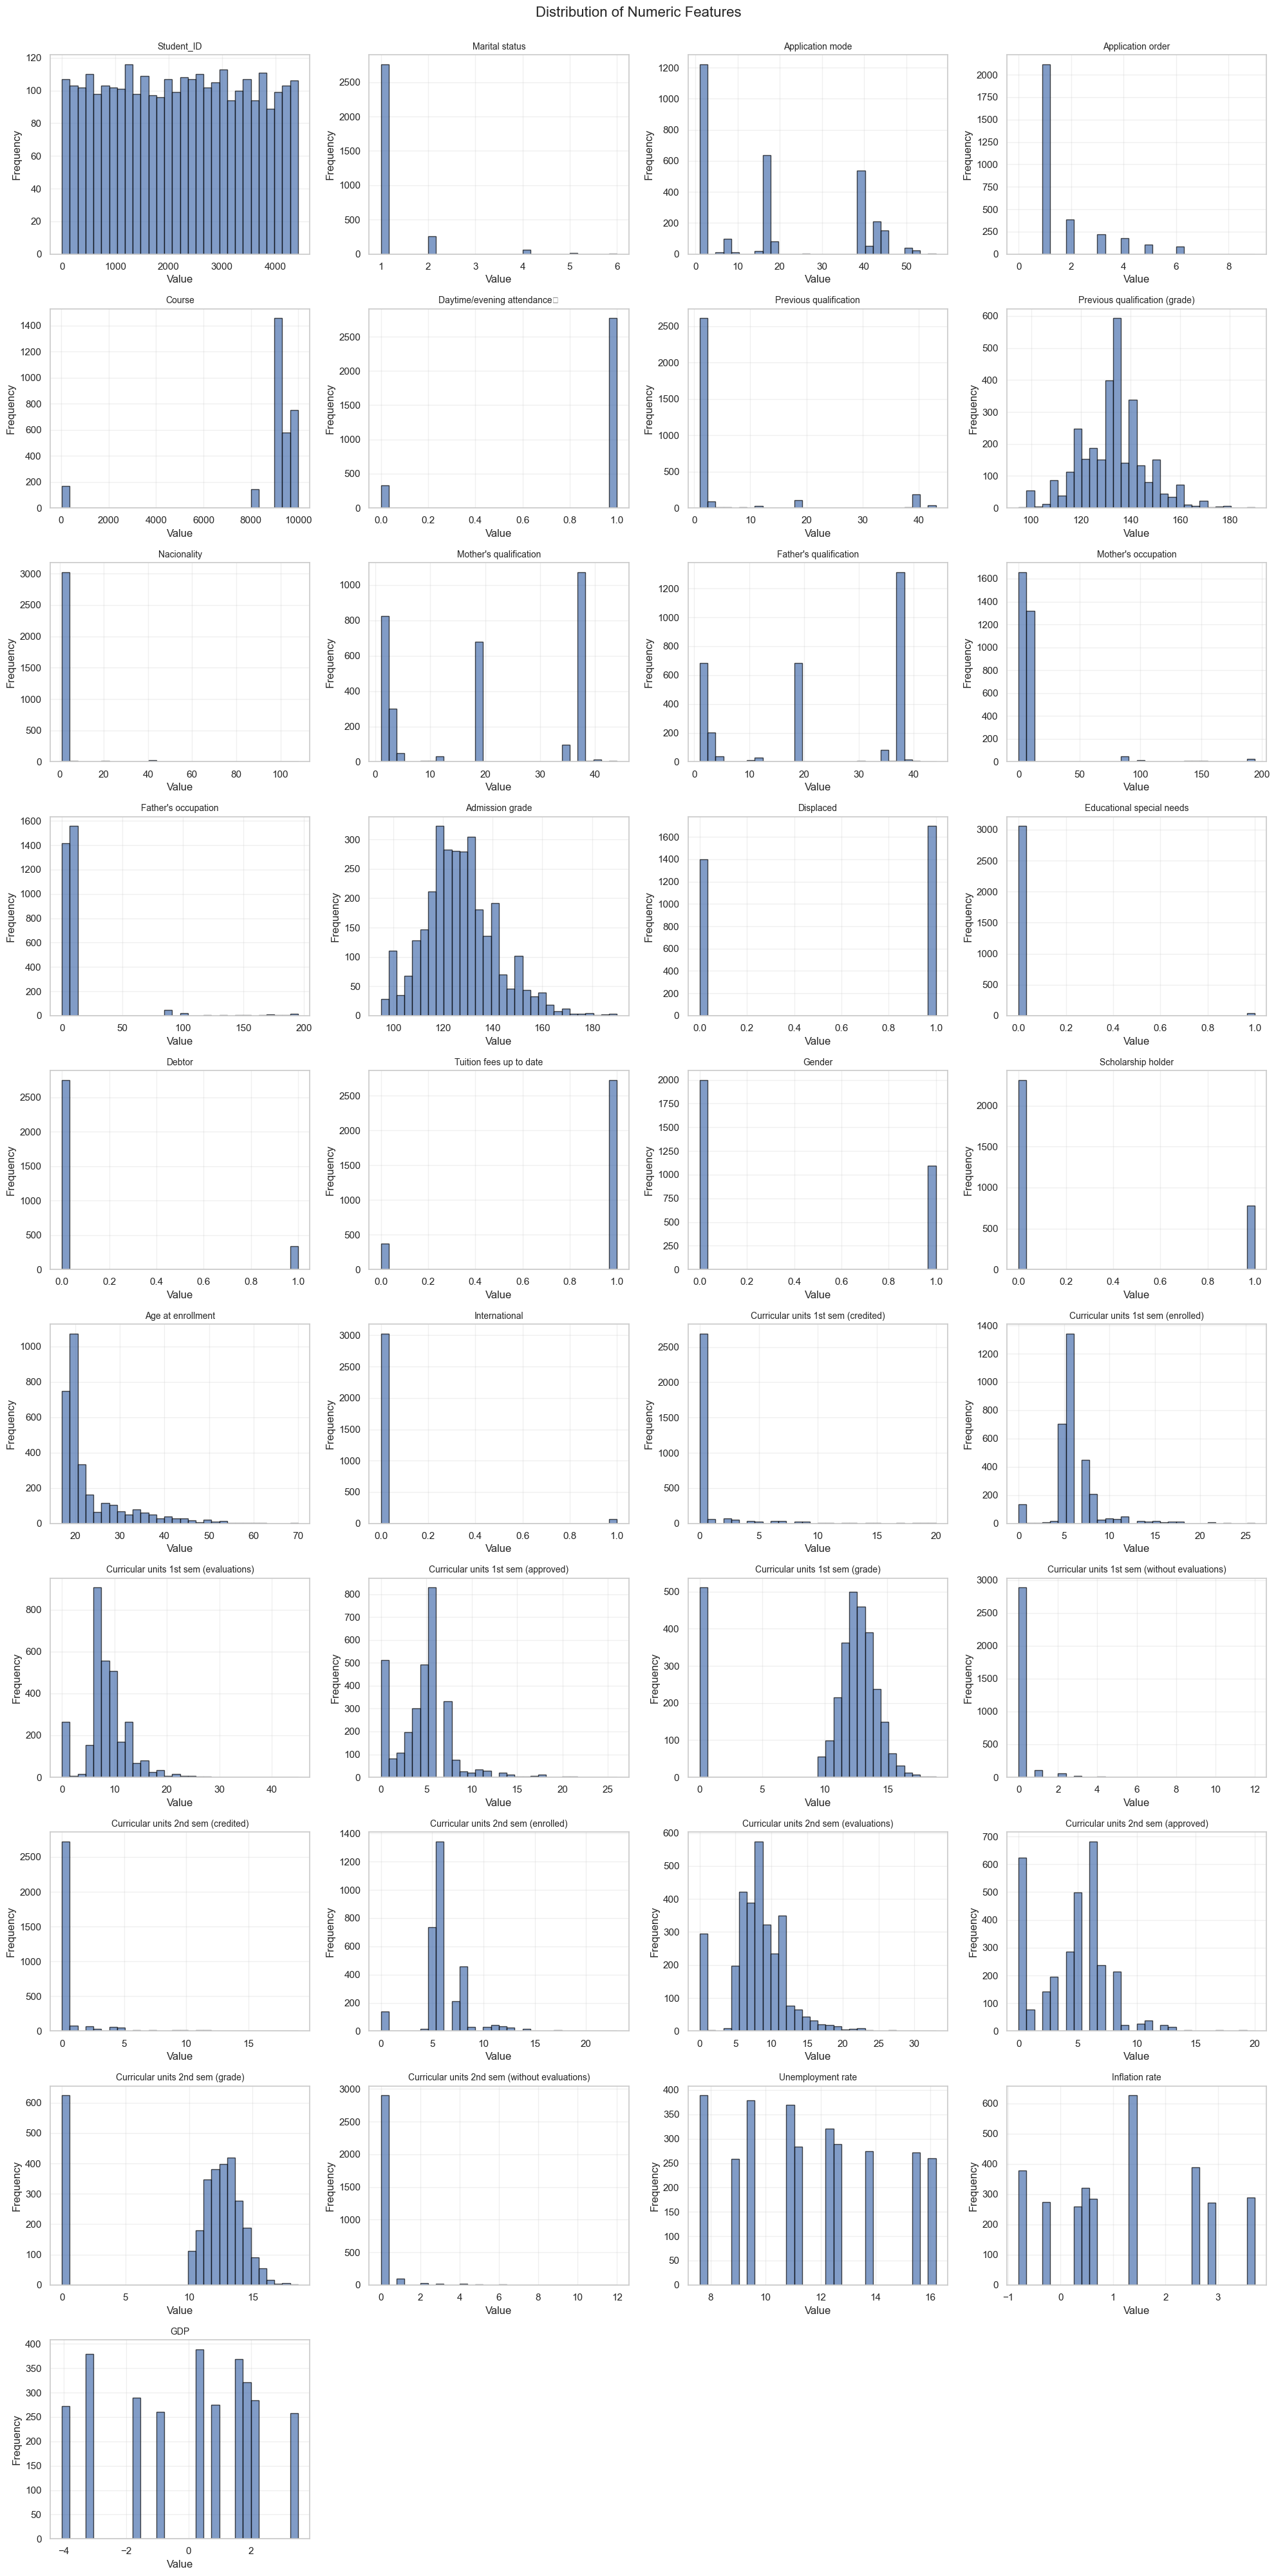

In [239]:
# ========== Additional Visualizations ==========

# 1. Missing Values Heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(train_df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap', fontsize=14)
plt.xlabel('Features')
plt.tight_layout()
plt.show()

# 2. Numeric Features Distribution
numeric_features = train_df.select_dtypes(include=[np.number]).columns.tolist()
if 'id' in numeric_features:
    numeric_features.remove('id')

if len(numeric_features) > 0:
    n_cols = 4
    n_rows = (len(numeric_features) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes
    
    for idx, col in enumerate(numeric_features[:len(axes)]):
        if idx < len(numeric_features):
            axes[idx].hist(train_df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
            axes[idx].set_title(f'{col}', fontsize=10)
            axes[idx].set_xlabel('Value')
            axes[idx].set_ylabel('Frequency')
            axes[idx].grid(alpha=0.3)
        else:
            axes[idx].axis('off')
    
    # Hide extra subplots
    for idx in range(len(numeric_features), len(axes)):
        axes[idx].axis('off')
    
    plt.suptitle('Distribution of Numeric Features', fontsize=16, y=1.00)
    plt.tight_layout()
    plt.show()

# 3. Categorical Features Distribution (if any)
categorical_features = train_df.select_dtypes(include=['object']).columns.tolist()
if 'Target' in categorical_features:
    categorical_features.remove('Target')

if len(categorical_features) > 0 and len(categorical_features) <= 12:
    n_cols = 3
    n_rows = (len(categorical_features) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows*4))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes
    
    for idx, col in enumerate(categorical_features):
        if idx < len(categorical_features):
            value_counts = train_df[col].value_counts().head(10)
            axes[idx].bar(range(len(value_counts)), value_counts.values, edgecolor='black', alpha=0.7)
            axes[idx].set_title(f'{col}', fontsize=10)
            axes[idx].set_xlabel('Category')
            axes[idx].set_ylabel('Count')
            axes[idx].set_xticks(range(len(value_counts)))
            axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right')
            axes[idx].grid(alpha=0.3, axis='y')
    
    # Hide extra subplots
    for idx in range(len(categorical_features), len(axes)):
        axes[idx].axis('off')
    
    plt.suptitle('Distribution of Categorical Features (Top 10 values)', fontsize=16, y=1.00)
    plt.tight_layout()
    plt.show()

/home/sayyaku/Documents/0 Kuliah/Inteligensi Artifisial/Akal-Imitasi/.venv/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.draw()
/home/sayyaku/Documents/0 Kuliah/Inteligensi Artifisial/Akal-Imitasi/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


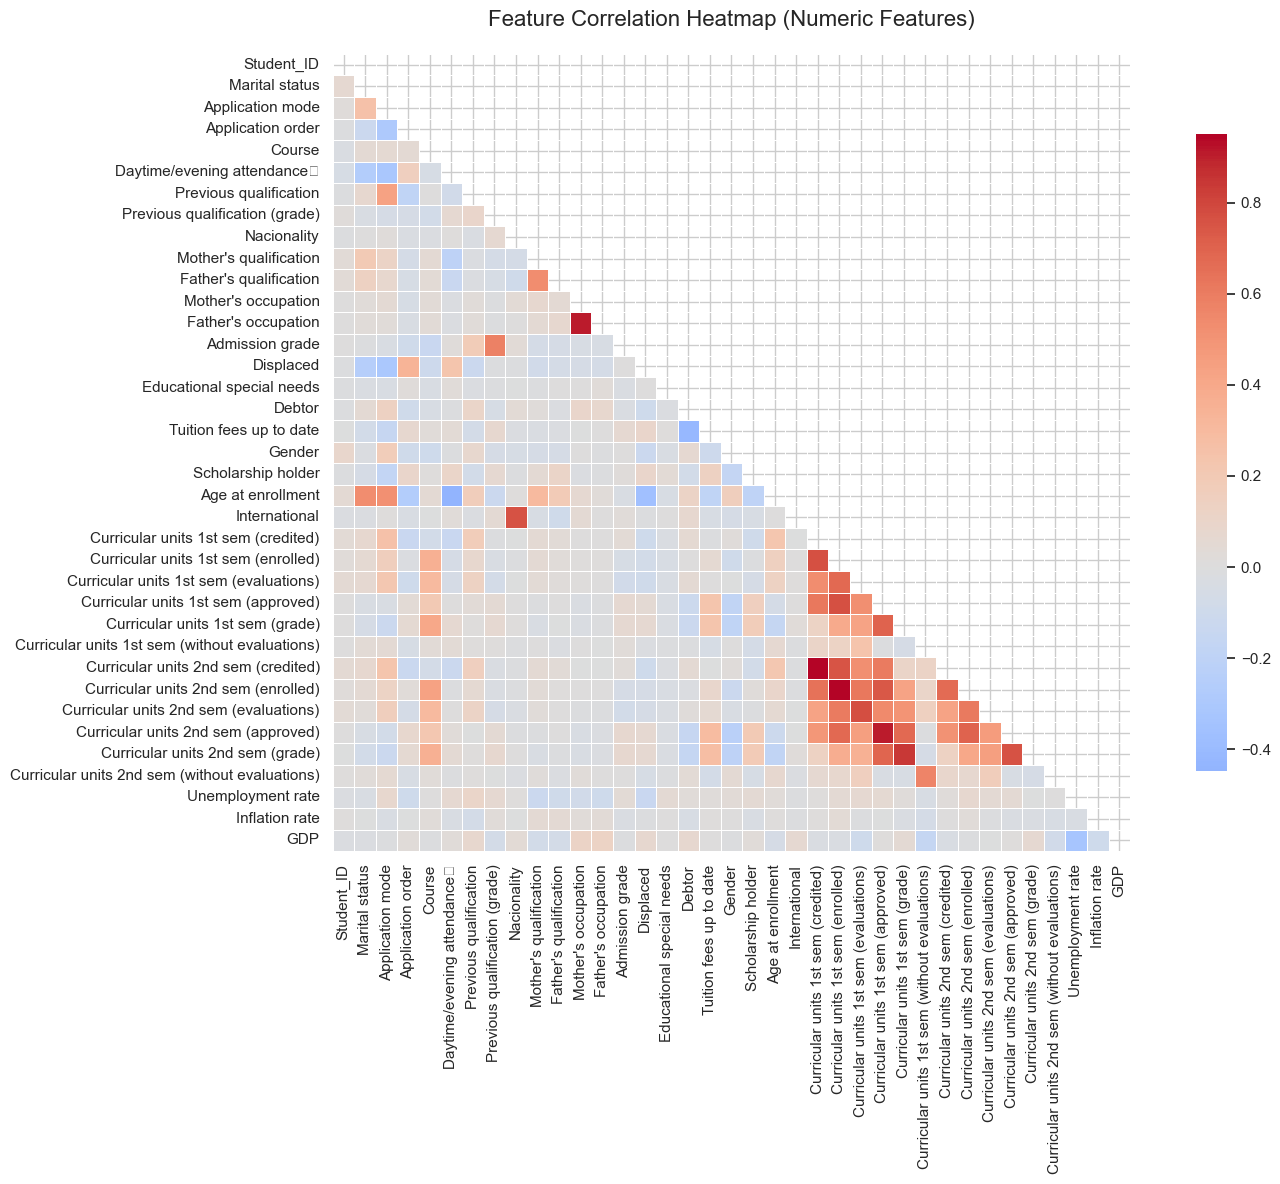


=== Highly Correlated Features (|correlation| > 0.7) ===


,Feature 1,Feature 2,Correlation
3,Curricular units 1st sem (credited),Curricular units 2nd sem (credited),0.951310
6,Curricular units 1st sem (enrolled),Curricular units 2nd sem (enrolled),0.945653
10,Curricular units 1st sem (approved),Curricular units 2nd sem (approved),0.904150
1,Mother's occupation,Father's occupation,0.902915
11,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),0.838009
7,Curricular units 1st sem (evaluations),Curricular units 2nd sem (evaluations),0.775330
4,Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),0.770317
2,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),0.768016
13,Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),0.764819
0,Nacionality,International,0.761875


In [240]:
# ========== Feature Correlation Heatmap ==========
# Select only numeric columns for correlation analysis
numeric_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()

# Remove id column if exists
if 'id' in numeric_cols:
    numeric_cols.remove('id')

# Calculate correlation matrix
plt.figure(figsize=(16, 12))
correlation_matrix = train_df[numeric_cols].corr()

# Create heatmap with annotations for high correlations
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=False, cmap='coolwarm', 
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap (Numeric Features)', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Show highly correlated features (|correlation| > 0.7)
print("\n=== Highly Correlated Features (|correlation| > 0.7) ===")
high_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            high_corr.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })

if high_corr:
    high_corr_df = pd.DataFrame(high_corr).sort_values('Correlation', ascending=False, key=abs)
    display(high_corr_df)
else:
    print("No highly correlated feature pairs found.")

# 1. Split Training Set and Validation Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

Note: For training, you should use the data contained in the `train` folder given by the TA. The `test` data is only used for kaggle submission.

/tmp/ipykernel_80581/2871573422.py:35: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  plt.tight_layout()
/home/sayyaku/Documents/0 Kuliah/Inteligensi Artifisial/Akal-Imitasi/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sayyaku/Documents/0 Kuliah/Inteligensi Artifisial/Akal-Imitasi/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


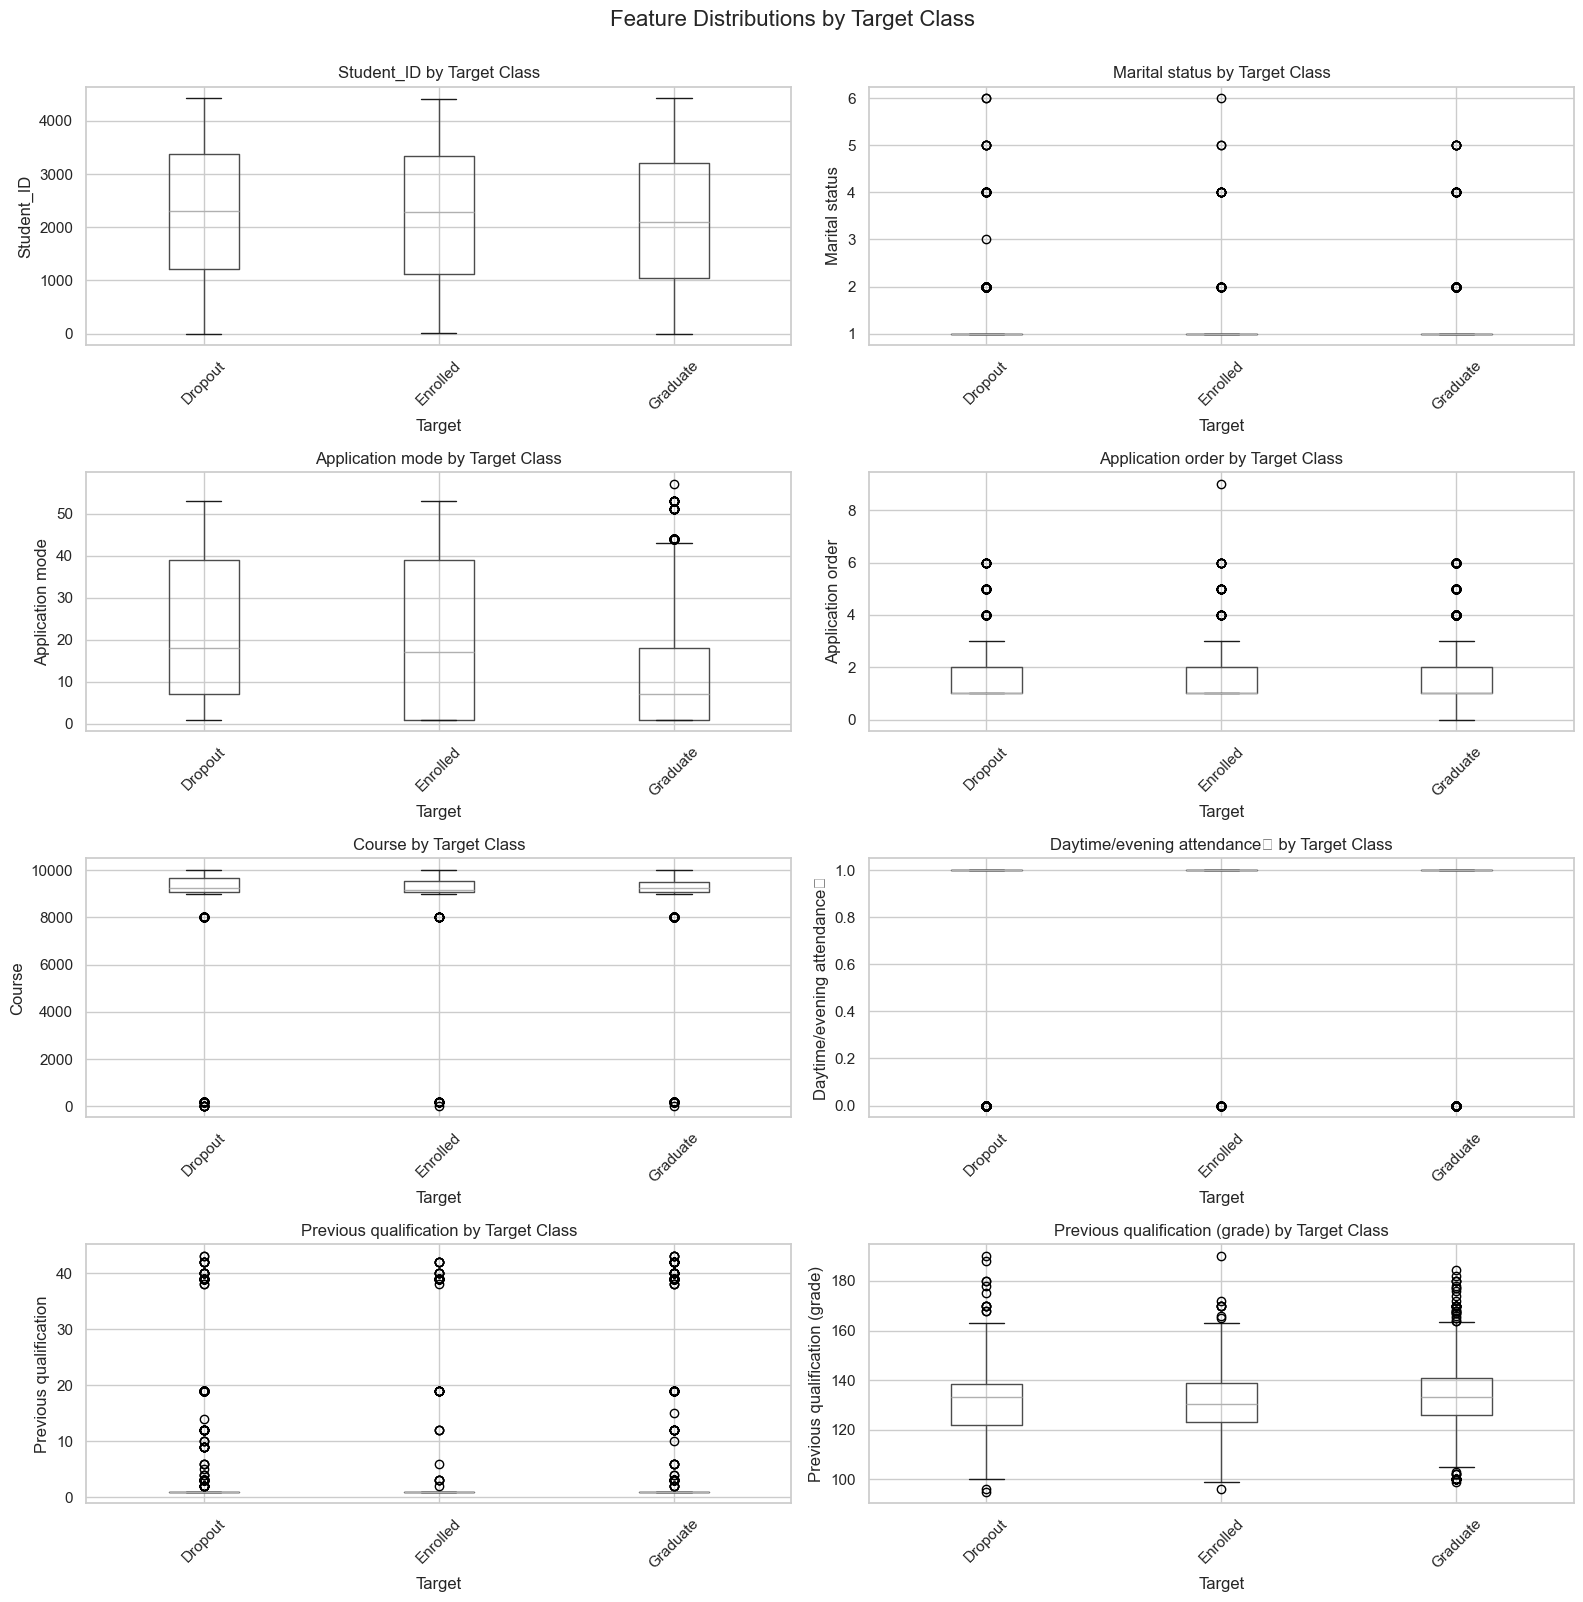


=== Feature Statistics by Target Class ===

--- Target: Graduate ---


,Student_ID,Marital status,Application mode,Application order,Course
count,1546.00,1546.00,1546.00,1546.00,1546.00
mean,2150.68,1.13,14.52,1.86,8880.88
std,1282.38,0.50,16.47,1.39,1995.76
min,2.00,1.00,1.00,0.00,33.00
25%,1043.25,1.00,1.00,1.00,9085.00
50%,2100.50,1.00,7.00,1.00,9254.00
75%,3205.75,1.00,18.00,2.00,9500.00
max,4424.00,5.00,57.00,6.00,9991.00



--- Target: Dropout ---


,Student_ID,Marital status,Application mode,Application order,Course
count,994.00,994.00,994.00,994.00,994.00
mean,2273.55,1.25,23.77,1.57,8726.95
std,1260.97,0.68,17.14,1.17,2345.34
min,1.00,1.00,1.00,1.00,33.00
25%,1221.50,1.00,7.00,1.00,9085.00
50%,2308.50,1.00,18.00,1.00,9238.00
75%,3370.75,1.00,39.00,2.00,9670.00
max,4422.00,6.00,53.00,6.00,9991.00



--- Target: Enrolled ---


,Student_ID,Marital status,Application mode,Application order,Course
count,556.00,556.00,556.00,556.00,556.00
mean,2215.45,1.13,19.44,1.60,8885.71
std,1275.15,0.55,17.98,1.17,2005.52
min,17.00,1.00,1.00,1.00,33.00
25%,1120.50,1.00,1.00,1.00,9085.00
50%,2295.00,1.00,17.00,1.00,9147.00
75%,3340.50,1.00,39.00,2.00,9556.00
max,4407.00,6.00,53.00,9.00,9991.00


In [241]:
# ========== Feature vs Target Analysis ==========
# Analyze how numeric features relate to target variable

if 'Target' in train_df.columns:
    # Select top numeric features for visualization
    numeric_features = train_df.select_dtypes(include=[np.number]).columns.tolist()
    if 'id' in numeric_features:
        numeric_features.remove('id')
    
    # Limit to first 8 features for clarity
    features_to_plot = numeric_features[:8] if len(numeric_features) > 8 else numeric_features
    
    if len(features_to_plot) > 0:
        n_cols = 2
        n_rows = (len(features_to_plot) + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows*4))
        axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes
        
        for idx, feature in enumerate(features_to_plot):
            if idx < len(features_to_plot):
                # Box plot for each target class
                train_df.boxplot(column=feature, by='Target', ax=axes[idx])
                axes[idx].set_title(f'{feature} by Target Class')
                axes[idx].set_xlabel('Target')
                axes[idx].set_ylabel(feature)
                plt.sca(axes[idx])
                plt.xticks(rotation=45)
        
        # Hide extra subplots
        for idx in range(len(features_to_plot), len(axes)):
            axes[idx].axis('off')
        
        plt.suptitle('Feature Distributions by Target Class', fontsize=16, y=1.00)
        plt.tight_layout()
        plt.show()
    
    # Create a summary statistics table by target
    print("\n=== Feature Statistics by Target Class ===")
    for target_val in train_df['Target'].unique():
        print(f"\n--- Target: {target_val} ---")
        subset = train_df[train_df['Target'] == target_val][numeric_features[:5]]
        display(subset.describe().round(2))

In [242]:
# Keep original training set before splitting
original_train_df = train_df.copy()

# Separate features and target
X = train_df.drop('Target', axis=1) if 'Target' in train_df.columns else train_df
y = train_df['Target'] if 'Target' in train_df.columns else None

# ========== IMPORTANT: Encode target labels to integers ==========
# Our from-scratch implementations require numeric labels
if y is not None and y.dtype == 'object':
    from sklearn.preprocessing import LabelEncoder
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    print("Target encoding mapping:")
    for idx, label in enumerate(label_encoder.classes_):
        print(f"  {label} -> {idx}")
    y = pd.Series(y_encoded, index=y.index, name='Target')
else:
    y_encoded = y

# Split into training and validation sets (80-20 split)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  # Maintain class distribution
)

print(f"\nTraining set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"\nClass distribution in training set:\n{pd.Series(y_train).value_counts().sort_index()}")
print(f"\nClass distribution in validation set:\n{pd.Series(y_val).value_counts().sort_index()}")

Target encoding mapping:
  Dropout -> 0
  Enrolled -> 1
  Graduate -> 2

Training set: (2476, 37)
Validation set: (620, 37)

Class distribution in training set:
Target
0     795
1     445
2    1236
Name: count, dtype: int64

Class distribution in validation set:
Target
0    199
1    111
2    310
Name: count, dtype: int64


# 2. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

We will give some common methods for you to try, but you only have to **at least implement one method for each process**. For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

## A. Data Cleaning

**Data cleaning** is the crucial first step in preparing your dataset for machine learning. Raw data collected from various sources is often messy and may contain errors, missing values, and inconsistencies. Data cleaning involves the following steps:

1. **Handling Missing Data:** Identify and address missing values in the dataset. This can include imputing missing values, removing rows or columns with excessive missing data, or using more advanced techniques like interpolation.

2. **Dealing with Outliers:** Identify and handle outliers, which are data points significantly different from the rest of the dataset. Outliers can be removed or transformed to improve model performance.

3. **Data Validation:** Check for data integrity and consistency. Ensure that data types are correct, categorical variables have consistent labels, and numerical values fall within expected ranges.

4. **Removing Duplicates:** Identify and remove duplicate rows, as they can skew the model's training process and evaluation metrics.

5. **Feature Engineering**: Create new features or modify existing ones to extract relevant information. This step can involve scaling, normalizing, or encoding features for better model interpretability.

### I. Handling Missing Data

Missing data can adversely affect the performance and accuracy of machine learning models. There are several strategies to handle missing data in machine learning:

1. **Data Imputation:**

    a. **Mean, Median, or Mode Imputation:** For numerical features, you can replace missing values with the mean, median, or mode of the non-missing values in the same feature. This method is simple and often effective when data is missing at random.

    b. **Constant Value Imputation:** You can replace missing values with a predefined constant value (e.g., 0) if it makes sense for your dataset and problem.

    c. **Imputation Using Predictive Models:** More advanced techniques involve using predictive models to estimate missing values. For example, you can train a regression model to predict missing numerical values or a classification model to predict missing categorical values.

2. **Deletion of Missing Data:**

    a. **Listwise Deletion:** In cases where the amount of missing data is relatively small, you can simply remove rows with missing values from your dataset. However, this approach can lead to a loss of valuable information.

    b. **Column (Feature) Deletion:** If a feature has a large number of missing values and is not critical for your analysis, you can consider removing that feature altogether.

3. **Domain-Specific Strategies:**

    a. **Domain Knowledge:** In some cases, domain knowledge can guide the imputation process. For example, if you know that missing values are related to a specific condition, you can impute them accordingly.

4. **Imputation Libraries:**

    a. **Scikit-Learn:** Scikit-Learn provides a `SimpleImputer` class that can handle basic imputation strategies like mean, median, and mode imputation.

    b. **Fancyimpute:** Fancyimpute is a Python library that offers more advanced imputation techniques, including matrix factorization, k-nearest neighbors, and deep learning-based methods.

The choice of imputation method should be guided by the nature of your data, the amount of missing data, the problem you are trying to solve, and the assumptions you are willing to make.

In [243]:
# Write your code here

### II. Dealing with Outliers

Outliers are data points that significantly differ from the majority of the data. They can be unusually high or low values that do not fit the pattern of the rest of the dataset. Outliers can significantly impact model performance, so it is important to handle them properly.

Some methods to handle outliers:
1. **Imputation**: Replace with mean, median, or a boundary value.
2. **Clipping**: Cap values to upper and lower limits.
3. **Transformation**: Use log, square root, or power transformations to reduce their influence.
4. **Model-Based**: Use algorithms robust to outliers (e.g., tree-based models, Huber regression).

In [244]:
# Write your code here

### III. Remove Duplicates
Handling duplicate values is crucial because they can compromise data integrity, leading to inaccurate analysis and insights. Duplicate entries can bias machine learning models, causing overfitting and reducing their ability to generalize to new data. They also inflate the dataset size unnecessarily, increasing computational costs and processing times. Additionally, duplicates can distort statistical measures and lead to inconsistencies, ultimately affecting the reliability of data-driven decisions and reporting. Ensuring data quality by removing duplicates is essential for accurate, efficient, and consistent analysis.

In [245]:
# Write your code here

### IV. Feature Engineering

**Feature engineering** involves creating new features (input variables) or transforming existing ones to improve the performance of machine learning models. Feature engineering aims to enhance the model's ability to learn patterns and make accurate predictions from the data. It's often said that "good features make good models."

1. **Feature Selection:** Feature engineering can involve selecting the most relevant and informative features from the dataset. Removing irrelevant or redundant features not only simplifies the model but also reduces the risk of overfitting.

2. **Creating New Features:** Sometimes, the existing features may not capture the underlying patterns effectively. In such cases, engineers create new features that provide additional information. For example:
   
   - **Polynomial Features:** Engineers may create new features by taking the square, cube, or other higher-order terms of existing numerical features. This can help capture nonlinear relationships.
   
   - **Interaction Features:** Interaction features are created by combining two or more existing features. For example, if you have features "length" and "width," you can create an "area" feature by multiplying them.

3. **Binning or Discretization:** Continuous numerical features can be divided into bins or categories. For instance, age values can be grouped into bins like "child," "adult," and "senior."

4. **Domain-Specific Feature Engineering:** Depending on the domain and problem, engineers may create domain-specific features. For example, in fraud detection, features related to transaction history and user behavior may be engineered to identify anomalies.

Feature engineering is both a creative and iterative process. It requires a deep understanding of the data, domain knowledge, and experimentation to determine which features will enhance the model's predictive power.

In [246]:
# Write your code here

## B. Data Preprocessing

**Data preprocessing** is a broader step that encompasses both data cleaning and additional transformations to make the data suitable for machine learning algorithms. Its primary goals are:

1. **Feature Scaling:** Ensure that numerical features have similar scales. Common techniques include Min-Max scaling (scaling to a specific range) or standardization (mean-centered, unit variance).

2. **Encoding Categorical Variables:** Machine learning models typically work with numerical data, so categorical variables need to be encoded. This can be done using one-hot encoding, label encoding, or more advanced methods like target encoding.

3. **Handling Imbalanced Classes:** If dealing with imbalanced classes in a binary classification task, apply techniques such as oversampling, undersampling, or using different evaluation metrics to address class imbalance.

4. **Dimensionality Reduction:** Reduce the number of features using techniques like Principal Component Analysis (PCA) or feature selection to simplify the model and potentially improve its performance.

5. **Normalization:** Normalize data to achieve a standard distribution. This is particularly important for algorithms that assume normally distributed data.

### Notes on Preprocessing processes

It is advised to create functions or classes that have the same/similar type of inputs and outputs, so you can add, remove, or swap the order of the processes easily. You can implement the functions or classes by yourself

or

use `sklearn` library. To create a new preprocessing component in `sklearn`, implement a corresponding class that includes:
1. Inheritance to `BaseEstimator` and `TransformerMixin`
2. The method `fit`
3. The method `transform`

In [247]:
# Example

# from sklearn.base import BaseEstimator, TransformerMixin

# class FeatureEncoder(BaseEstimator, TransformerMixin):

#     def fit(self, X, y=None):

#         # Fit the encoder here

#         return self

#     def transform(self, X):
#         X_encoded = X.copy()

#         # Encode the categorical variables here

#         return X_encoded

### I. Feature Scaling

**Feature scaling** is a preprocessing technique used in machine learning to standardize the range of independent variables or features of data. The primary goal of feature scaling is to ensure that all features contribute equally to the training process and that machine learning algorithms can work effectively with the data.

Here are the main reasons why feature scaling is important:

1. **Algorithm Sensitivity:** Many machine learning algorithms are sensitive to the scale of input features. If the scales of features are significantly different, some algorithms may perform poorly or take much longer to converge.

2. **Distance-Based Algorithms:** Algorithms that rely on distances or similarities between data points, such as k-nearest neighbors (KNN) and support vector machines (SVM), can be influenced by feature scales. Features with larger scales may dominate the distance calculations.

3. **Regularization:** Regularization techniques, like L1 (Lasso) and L2 (Ridge) regularization, add penalty terms based on feature coefficients. Scaling ensures that all features are treated equally in the regularization process.

Common methods for feature scaling include:

1. **Min-Max Scaling (Normalization):** This method scales features to a specific range, typically [0, 1]. It's done using the following formula:

   $$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$$

   - Here, $X$ is the original feature value, $X_{min}$ is the minimum value of the feature, and $X_{max}$ is the maximum value of the feature.  
<br />
<br />
2. **Standardization (Z-score Scaling):** This method scales features to have a mean (average) of 0 and a standard deviation of 1. It's done using the following formula:

   $$X' = \frac{X - \mu}{\sigma}$$

   - $X$ is the original feature value, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.  
<br />
<br />
3. **Robust Scaling:** Robust scaling is a method that scales features to the interquartile range (IQR) and is less affected by outliers. It's calculated as:

   $$X' = \frac{X - Q1}{Q3 - Q1}$$

   - $X$ is the original feature value, $Q1$ is the first quartile (25th percentile), and $Q3$ is the third quartile (75th percentile) of the feature.  
<br />
<br />
4. **Log Transformation:** In cases where data is highly skewed or has a heavy-tailed distribution, taking the logarithm of the feature values can help stabilize the variance and improve scaling.

The choice of scaling method depends on the characteristics of your data and the requirements of your machine learning algorithm. **Min-max scaling and standardization are the most commonly used techniques and work well for many datasets.**

Scaling should be applied separately to each training and test set to prevent data leakage from the test set into the training set. Additionally, **some algorithms may not require feature scaling, particularly tree-based models.**

In [248]:
# Write your code here

### II. Feature Encoding

**Feature encoding**, also known as **categorical encoding**, is the process of converting categorical data (non-numeric data) into a numerical format so that it can be used as input for machine learning algorithms. Most machine learning models require numerical data for training and prediction, so feature encoding is a critical step in data preprocessing.

Categorical data can take various forms, including:

1. **Nominal Data:** Categories with no intrinsic order, like colors or country names.  

2. **Ordinal Data:** Categories with a meaningful order but not necessarily equidistant, like education levels (e.g., "high school," "bachelor's," "master's").

There are several common methods for encoding categorical data:

1. **Label Encoding:**

   - Label encoding assigns a unique integer to each category in a feature.
   - It's suitable for ordinal data where there's a clear order among categories.
   - For example, if you have an "education" feature with values "high school," "bachelor's," and "master's," you can encode them as 0, 1, and 2, respectively.
<br />
<br />
2. **One-Hot Encoding:**

   - One-hot encoding creates a binary (0 or 1) column for each category in a nominal feature.
   - It's suitable for nominal data where there's no inherent order among categories.
   - Each category becomes a new feature, and the presence (1) or absence (0) of a category is indicated for each row.
<br />
<br />
3. **Target Encoding (Mean Encoding):**

   - Target encoding replaces each category with the mean of the target variable for that category.
   - It's often used for classification problems.

In [249]:
# Write your code here

### III. Handling Imbalanced Dataset

**Handling imbalanced datasets** is important because imbalanced data can lead to several issues that negatively impact the performance and reliability of machine learning models. Here are some key reasons:

1. **Biased Model Performance**:

 - Models trained on imbalanced data tend to be biased towards the majority class, leading to poor performance on the minority class. This can result in misleading accuracy metrics.

2. **Misleading Accuracy**:

 - High overall accuracy can be misleading in imbalanced datasets. For example, if 95% of the data belongs to one class, a model that always predicts the majority class will have 95% accuracy but will fail to identify the minority class.

3. **Poor Generalization**:

 - Models trained on imbalanced data may not generalize well to new, unseen data, especially if the minority class is underrepresented.


Some methods to handle imbalanced datasets:
1. **Resampling Methods**:

 - Oversampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples (e.g., SMOTE).
 - Undersampling: Reduce the number of instances in the majority class to balance the dataset.

2. **Evaluation Metrics**:

 - Use appropriate evaluation metrics such as precision, recall, F1-score, ROC-AUC, and confusion matrix instead of accuracy to better assess model performance on imbalanced data.

3. **Algorithmic Approaches**:

 - Use algorithms that are designed to handle imbalanced data, such as decision trees, random forests, or ensemble methods.
 - Adjust class weights in algorithms to give more importance to the minority class.

In [250]:
# Write your code here

### IV. Data Normalization

Data normalization is used to achieve a standard distribution. Without normalization, models or processes that rely on the assumption of normality may not work correctly. Normalization helps reduce the magnitude effect and ensures numerical stability during optimization.

In [251]:
# Write your code here

### V. Dimensionality Reduction

Dimensionality reduction is a technique used in data preprocessing to reduce the number of input features (dimensions) in a dataset while retaining as much important information as possible. It is essential when dealing with high-dimensional data, where too many features can cause problems like increased computational costs, overfitting, and difficulty in visualization. Reducing dimensions simplifies the data, making it easier to analyze and improving the performance of machine learning models.

One of the main approaches to dimensionality reduction is feature extraction. Feature extraction creates new, smaller sets of features that capture the essence of the original data. Common techniques include:

1. **Principal Component Analysis (PCA)**: Converts correlated features into a smaller number of uncorrelated "principal components."
2. **t-SNE (t-Distributed Stochastic Neighbor Embedding)**: A visualization-focused method to project high-dimensional data into 2D or 3D spaces.
3. **Autoencoders**: Neural networks that learn compressed representations of the data.

In [252]:
# Write your code here

# 3. Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.

In [253]:
# from sklearn.pipeline import Pipeline

# # Note: You can add or delete preprocessing components from this pipeline

# pipe = Pipeline([("imputer", FeatureImputer()),
#                  ("featurecreator", FeatureCreator()),
#                  ("scaler", FeatureScaler()),
#                  ("encoder", FeatureEncoder())])

# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

In [254]:
# # Your code should work up until this point
# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

or create your own here

In [255]:
# Write your code here

# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the target feature `attack_cat`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

## A. DTL

Training C4.5 Decision Tree (From Scratch)...

=== C4.5 Decision Tree From Scratch ===
Accuracy: 0.7177
Precision: 0.6404
Recall: 0.7177
F1-Score: 0.6521

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       199
           1       0.25      0.02      0.03       111
           2       0.72      0.96      0.82       310

    accuracy                           0.72       620
   macro avg       0.57      0.57      0.53       620
weighted avg       0.64      0.72      0.65       620


=== C4.5 Decision Tree From Scratch ===
Accuracy: 0.7177
Precision: 0.6404
Recall: 0.7177
F1-Score: 0.6521

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       199
           1       0.25      0.02      0.03       111
           2       0.72      0.96      0.82       310

    accuracy                           0.72       620
   macro avg       0.57      0.57    

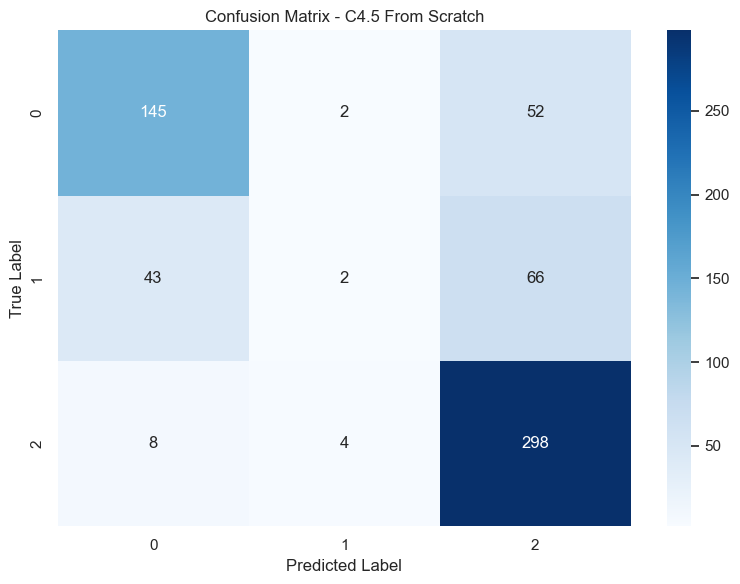


Training Decision Tree with Scikit-learn...

=== DTL Scikit-learn (Entropy-based) ===
Accuracy: 0.7323
Precision: 0.7238
Recall: 0.7323
F1-Score: 0.7271

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       199
           1       0.46      0.40      0.43       111
           2       0.79      0.84      0.81       310

    accuracy                           0.73       620
   macro avg       0.67      0.66      0.67       620
weighted avg       0.72      0.73      0.73       620



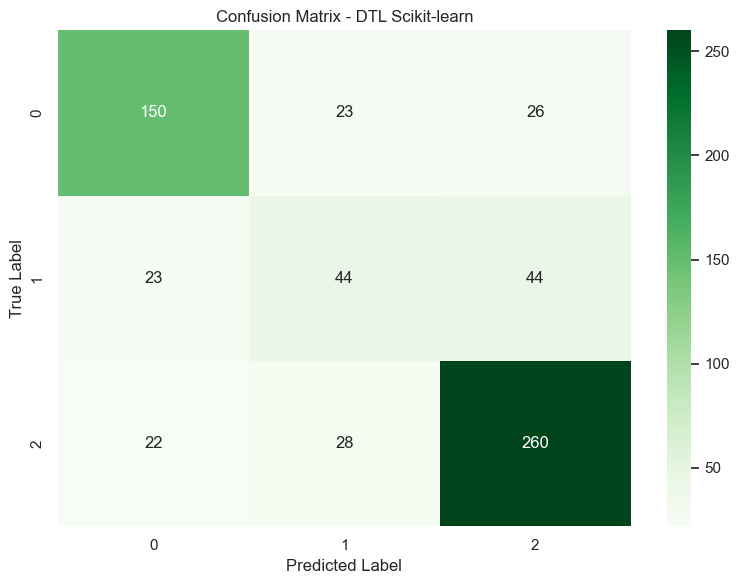

In [256]:
# ========== DTL From Scratch (C4.5 - Recommended) ==========
print("Training C4.5 Decision Tree (From Scratch)...")
dtl_scratch = C45Classifier(max_depth=12, min_samples_split=5, ccp_alpha=0.01)
dtl_scratch.fit(X_train, y_train)
y_pred_scratch = dtl_scratch.predict(X_val)

print("\n=== C4.5 Decision Tree From Scratch ===")
print(f"Accuracy: {accuracy_score(y_val, y_pred_scratch):.4f}")
print(f"Precision: {precision_score(y_val, y_pred_scratch, average='weighted', zero_division=0):.4f}")
print(f"Recall: {recall_score(y_val, y_pred_scratch, average='weighted', zero_division=0):.4f}")
print(f"F1-Score: {f1_score(y_val, y_pred_scratch, average='weighted', zero_division=0):.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred_scratch, zero_division=0))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm_scratch = confusion_matrix(y_val, y_pred_scratch)
sns.heatmap(cm_scratch, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - C4.5 From Scratch')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# ========== DTL Scikit-learn (for comparison) ==========
print("\n" + "="*50)
print("Training Decision Tree with Scikit-learn...")
from sklearn.tree import DecisionTreeClassifier

# ID3 equivalent: use entropy
dtl_sklearn = DecisionTreeClassifier(
    criterion='entropy',  # Use entropy like ID3/C4.5
    max_depth=12,
    min_samples_split=5,
    random_state=42
)
dtl_sklearn.fit(X_train, y_train)
y_pred_sklearn = dtl_sklearn.predict(X_val)

print("\n=== DTL Scikit-learn (Entropy-based) ===")
print(f"Accuracy: {accuracy_score(y_val, y_pred_sklearn):.4f}")
print(f"Precision: {precision_score(y_val, y_pred_sklearn, average='weighted', zero_division=0):.4f}")
print(f"Recall: {recall_score(y_val, y_pred_sklearn, average='weighted', zero_division=0):.4f}")
print(f"F1-Score: {f1_score(y_val, y_pred_sklearn, average='weighted', zero_division=0):.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred_sklearn, zero_division=0))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm_sklearn = confusion_matrix(y_val, y_pred_sklearn)
sns.heatmap(cm_sklearn, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - DTL Scikit-learn')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

## B. Logistic Regression

Training Logistic Regression with Stochastic Gradient Ascent...

=== Logistic Regression From Scratch (SGA) ===
Accuracy: 0.4161
Precision: 0.4274
Recall: 0.4161
F1-Score: 0.3511

Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.88      0.51       199
           1       0.00      0.00      0.00       111
           2       0.62      0.27      0.37       310

    accuracy                           0.42       620
   macro avg       0.33      0.38      0.29       620
weighted avg       0.43      0.42      0.35       620


=== Logistic Regression From Scratch (SGA) ===
Accuracy: 0.4161
Precision: 0.4274
Recall: 0.4161
F1-Score: 0.3511

Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.88      0.51       199
           1       0.00      0.00      0.00       111
           2       0.62      0.27      0.37       310

    accuracy                           0.42       620
   ma

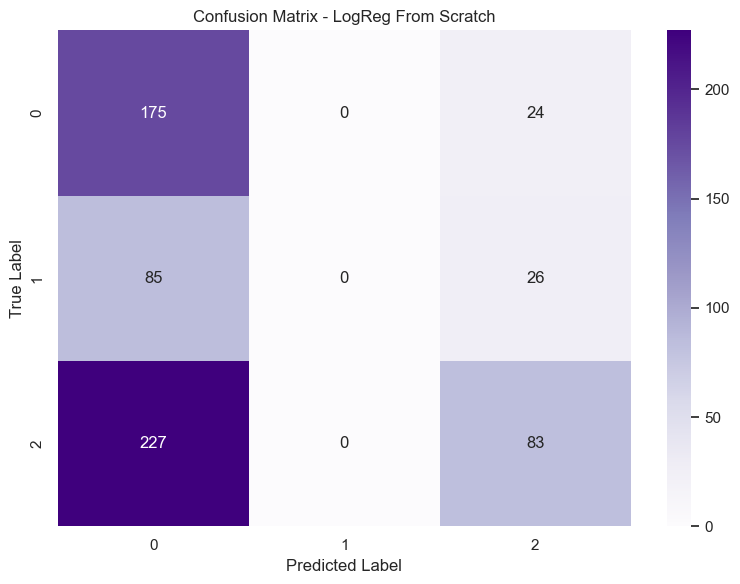


Training Logistic Regression with Scikit-learn...

=== Logistic Regression Scikit-learn ===
Accuracy: 0.7435
Precision: 0.7256
Recall: 0.7435
F1-Score: 0.7231

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       199
           1       0.55      0.28      0.37       111
           2       0.76      0.91      0.83       310

    accuracy                           0.74       620
   macro avg       0.69      0.64      0.65       620
weighted avg       0.73      0.74      0.72       620


=== Logistic Regression Scikit-learn ===
Accuracy: 0.7435
Precision: 0.7256
Recall: 0.7435
F1-Score: 0.7231

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       199
           1       0.55      0.28      0.37       111
           2       0.76      0.91      0.83       310

    accuracy                           0.74       620
   macro avg       0.69      0

/home/sayyaku/Documents/0 Kuliah/Inteligensi Artifisial/Akal-Imitasi/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


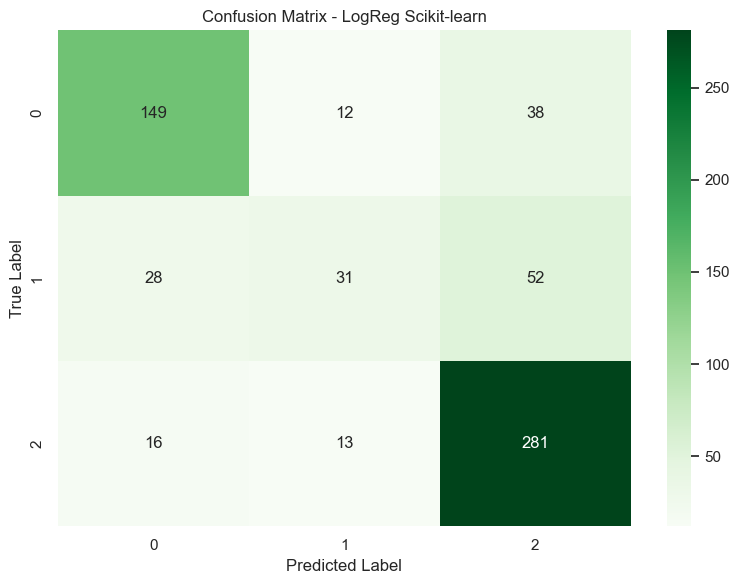

In [257]:
# ========== Logistic Regression From Scratch (SGA with L2) ==========
print("Training Logistic Regression with Stochastic Gradient Ascent...")
logreg_scratch = LogisticRegressionScratch(
    lr=0.01,        # Conservative learning rate
    n_iter=1000,    # Sufficient iterations
    l2=0.1,         # L2 regularization for correlated features
    batch_size=32   # Mini-batch for stability
)
logreg_scratch.fit(X_train, y_train)
y_pred_scratch = logreg_scratch.predict(X_val)

print("\n=== Logistic Regression From Scratch (SGA) ===")
print(f"Accuracy: {accuracy_score(y_val, y_pred_scratch):.4f}")
print(f"Precision: {precision_score(y_val, y_pred_scratch, average='weighted', zero_division=0):.4f}")
print(f"Recall: {recall_score(y_val, y_pred_scratch, average='weighted', zero_division=0):.4f}")
print(f"F1-Score: {f1_score(y_val, y_pred_scratch, average='weighted', zero_division=0):.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred_scratch, zero_division=0))

# Plot log-likelihood history (if available)
if len(logreg_scratch.loss_history) > 0:
    plt.figure(figsize=(10, 5))
    plt.plot(logreg_scratch.loss_history)
    plt.title('Log-Likelihood History (Gradient Ascent)')
    plt.xlabel('Epoch (x100)')
    plt.ylabel('Log-Likelihood')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm_scratch = confusion_matrix(y_val, y_pred_scratch)
sns.heatmap(cm_scratch, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix - LogReg From Scratch')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# ========== Logistic Regression Scikit-learn (for comparison) ==========
print("\n" + "="*50)
print("Training Logistic Regression with Scikit-learn...")
from sklearn.linear_model import LogisticRegression

logreg_sklearn = LogisticRegression(max_iter=1000, random_state=42)
logreg_sklearn.fit(X_train, y_train)
y_pred_sklearn = logreg_sklearn.predict(X_val)

print("\n=== Logistic Regression Scikit-learn ===")
print(f"Accuracy: {accuracy_score(y_val, y_pred_sklearn):.4f}")
print(f"Precision: {precision_score(y_val, y_pred_sklearn, average='weighted', zero_division=0):.4f}")
print(f"Recall: {recall_score(y_val, y_pred_sklearn, average='weighted', zero_division=0):.4f}")
print(f"F1-Score: {f1_score(y_val, y_pred_sklearn, average='weighted', zero_division=0):.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred_sklearn, zero_division=0))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm_sklearn = confusion_matrix(y_val, y_pred_sklearn)
sns.heatmap(cm_sklearn, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - LogReg Scikit-learn')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

## C. SVM

Training SVM with One-vs-All strategy...
NOTE: SVM requires feature scaling!

=== SVM From Scratch (One-vs-All) ===
Accuracy: 0.7306
Precision: 0.7009
Recall: 0.7306
F1-Score: 0.6838

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       199
           1       0.52      0.10      0.17       111
           2       0.73      0.93      0.81       310

    accuracy                           0.73       620
   macro avg       0.67      0.60      0.58       620
weighted avg       0.70      0.73      0.68       620


=== SVM From Scratch (One-vs-All) ===
Accuracy: 0.7306
Precision: 0.7009
Recall: 0.7306
F1-Score: 0.6838

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       199
           1       0.52      0.10      0.17       111
           2       0.73      0.93      0.81       310

    accuracy                           0.73       620
   macro a

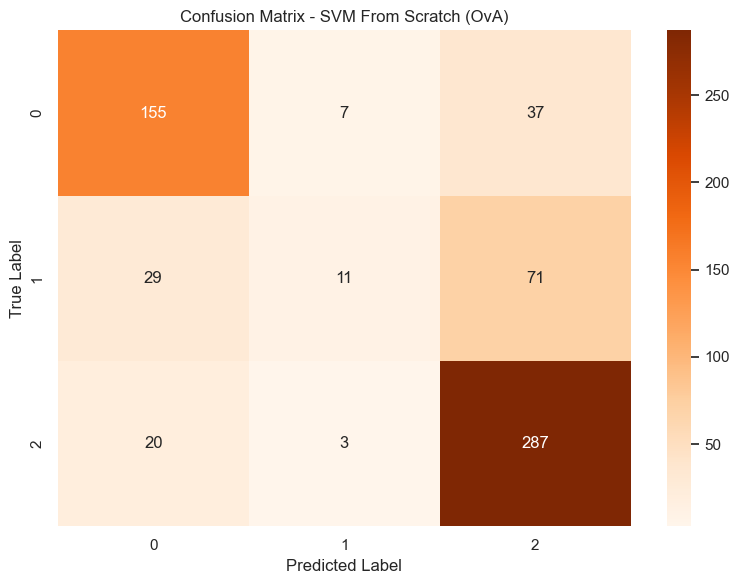


Training SVM with Scikit-learn...

=== SVM Scikit-learn (Linear Kernel) ===
Accuracy: 0.7823
Precision: 0.7701
Recall: 0.7823
F1-Score: 0.7656

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       199
           1       0.59      0.34      0.43       111
           2       0.78      0.95      0.86       310

    accuracy                           0.78       620
   macro avg       0.74      0.69      0.70       620
weighted avg       0.77      0.78      0.77       620


=== SVM Scikit-learn (Linear Kernel) ===
Accuracy: 0.7823
Precision: 0.7701
Recall: 0.7823
F1-Score: 0.7656

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       199
           1       0.59      0.34      0.43       111
           2       0.78      0.95      0.86       310

    accuracy                           0.78       620
   macro avg       0.74      0.69      0.70   

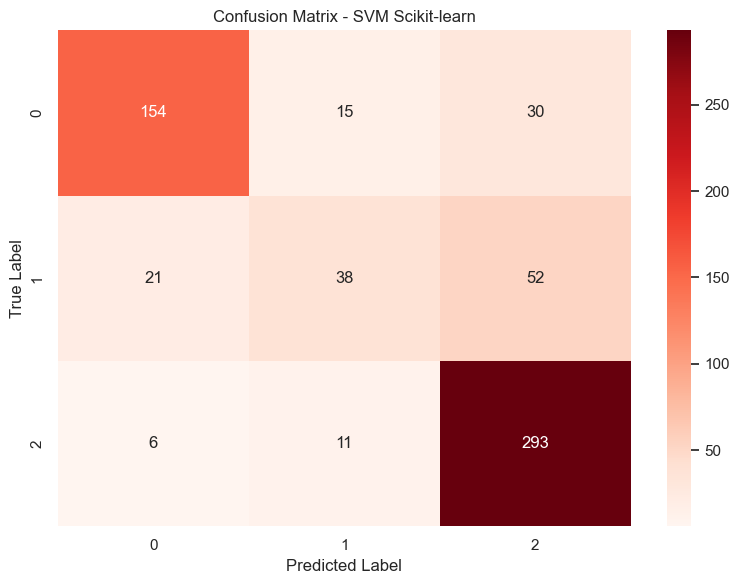

In [258]:
# ========== SVM From Scratch (One-vs-All - Recommended for K=3) ==========
print("Training SVM with One-vs-All strategy...")
print("NOTE: SVM requires feature scaling!")

# Scale features for SVM
from sklearn.preprocessing import StandardScaler

scaler_svm = StandardScaler()
X_train_scaled = scaler_svm.fit_transform(X_train)
X_val_scaled = scaler_svm.transform(X_val)

svm_scratch = SVMOneVsAll(
    lr=0.001,    # Smaller learning rate for SVM
    C=1.0,       # Regularization parameter
    n_iter=1000
)
svm_scratch.fit(X_train_scaled, y_train)
y_pred_scratch = svm_scratch.predict(X_val_scaled)

print("\n=== SVM From Scratch (One-vs-All) ===")
print(f"Accuracy: {accuracy_score(y_val, y_pred_scratch):.4f}")
print(f"Precision: {precision_score(y_val, y_pred_scratch, average='weighted', zero_division=0):.4f}")
print(f"Recall: {recall_score(y_val, y_pred_scratch, average='weighted', zero_division=0):.4f}")
print(f"F1-Score: {f1_score(y_val, y_pred_scratch, average='weighted', zero_division=0):.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred_scratch, zero_division=0))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm_scratch = confusion_matrix(y_val, y_pred_scratch)
sns.heatmap(cm_scratch, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - SVM From Scratch (OvA)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# ========== SVM Scikit-learn (for comparison) ==========
print("\n" + "="*50)
print("Training SVM with Scikit-learn...")
from sklearn.svm import SVC

svm_sklearn = SVC(kernel='linear', C=1.0, random_state=42)
svm_sklearn.fit(X_train_scaled, y_train)
y_pred_sklearn = svm_sklearn.predict(X_val_scaled)

print("\n=== SVM Scikit-learn (Linear Kernel) ===")
print(f"Accuracy: {accuracy_score(y_val, y_pred_sklearn):.4f}")
print(f"Precision: {precision_score(y_val, y_pred_sklearn, average='weighted', zero_division=0):.4f}")
print(f"Recall: {recall_score(y_val, y_pred_sklearn, average='weighted', zero_division=0):.4f}")
print(f"F1-Score: {f1_score(y_val, y_pred_sklearn, average='weighted', zero_division=0):.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred_sklearn, zero_division=0))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm_sklearn = confusion_matrix(y_val, y_pred_sklearn)
sns.heatmap(cm_sklearn, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix - SVM Scikit-learn')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

## D. Improvements (Optional)

- **Visualize the model evaluation result**

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- **Explore the hyperparameters of your models**

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called **hyperparameter tuning**. (Hint: Grid search, random search, bayesian optimization)

- **Cross-validation**

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more **robust** and **reliable** evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

,Model,Accuracy,Precision,Recall,F1-Score
0,DTL Scratch,0.730645,0.700942,0.730645,0.683829
1,DTL Sklearn,0.782258,0.770056,0.782258,0.765641
2,LogReg Scratch,0.416129,0.427368,0.416129,0.351118
3,LogReg Sklearn,0.743548,0.725607,0.743548,0.723097
4,SVM Scratch,0.730645,0.700942,0.730645,0.683829
5,SVM Sklearn,0.782258,0.770056,0.782258,0.765641


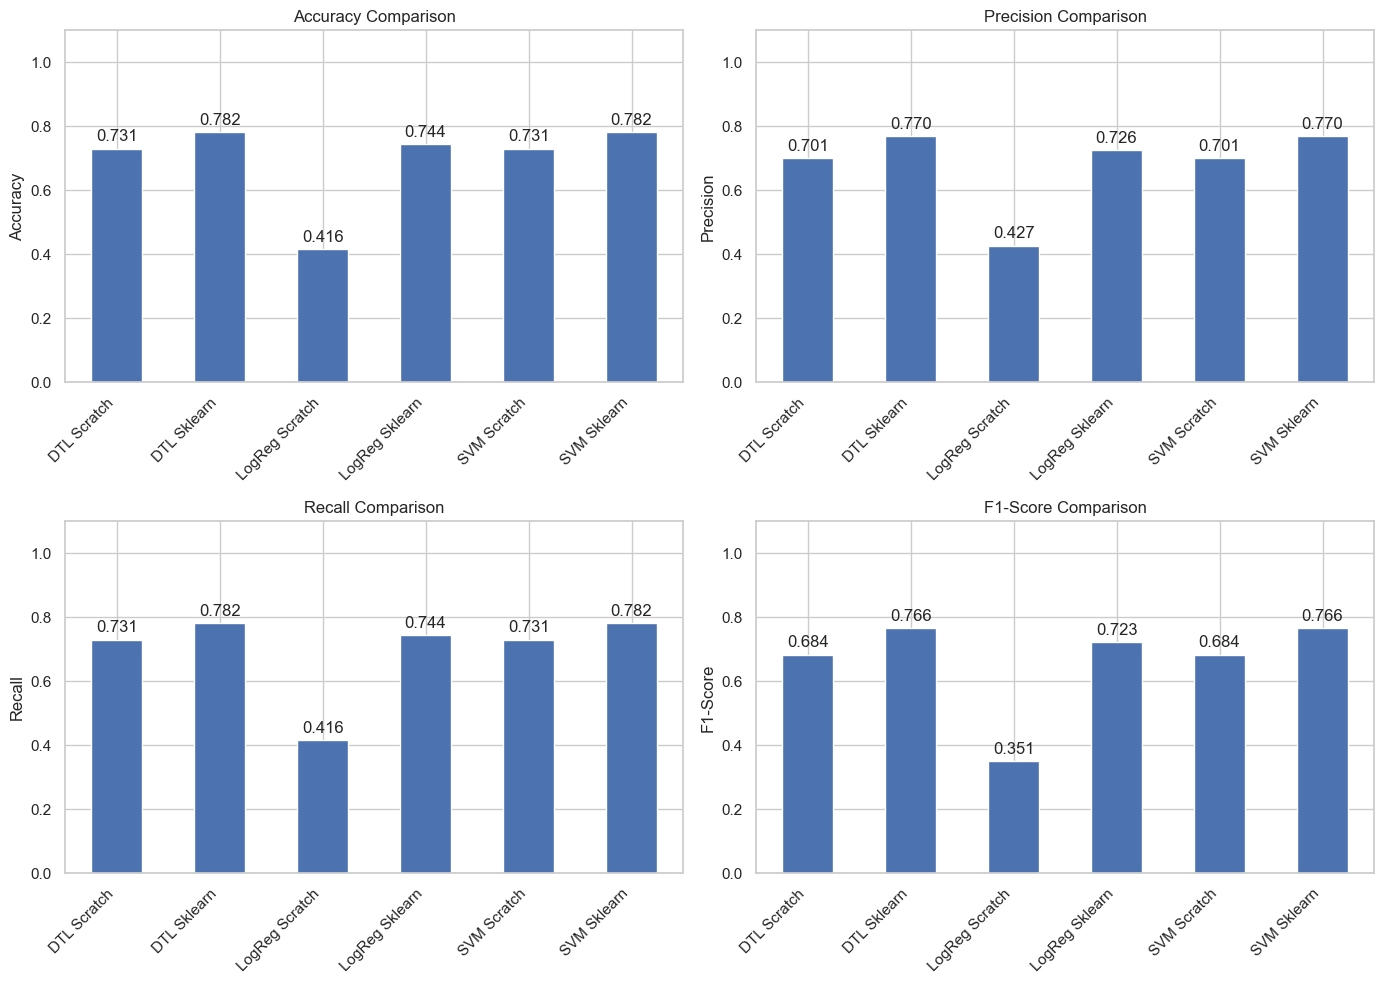

In [259]:
# ========== Model Comparison: From-Scratch vs Scikit-learn ==========

results = {
    'Model': ['DTL Scratch', 'DTL Sklearn', 'LogReg Scratch', 'LogReg Sklearn', 'SVM Scratch', 'SVM Sklearn'],
    'Accuracy': [
        accuracy_score(y_val, y_pred_scratch),  # From DTL (cell 34)
        accuracy_score(y_val, y_pred_sklearn),  # From DTL (cell 34)
        accuracy_score(y_val, logreg_scratch.predict(X_val)),  # Recompute
        accuracy_score(y_val, logreg_sklearn.predict(X_val)),  # Recompute
        accuracy_score(y_val, svm_scratch.predict(X_val_scaled)),  # Recompute
        accuracy_score(y_val, svm_sklearn.predict(X_val_scaled))  # Recompute
    ],
    'Precision': [
        precision_score(y_val, y_pred_scratch, average='weighted', zero_division=0),
        precision_score(y_val, y_pred_sklearn, average='weighted', zero_division=0),
        precision_score(y_val, logreg_scratch.predict(X_val), average='weighted', zero_division=0),
        precision_score(y_val, logreg_sklearn.predict(X_val), average='weighted', zero_division=0),
        precision_score(y_val, svm_scratch.predict(X_val_scaled), average='weighted', zero_division=0),
        precision_score(y_val, svm_sklearn.predict(X_val_scaled), average='weighted', zero_division=0)
    ],
    'Recall': [
        recall_score(y_val, y_pred_scratch, average='weighted', zero_division=0),
        recall_score(y_val, y_pred_sklearn, average='weighted', zero_division=0),
        recall_score(y_val, logreg_scratch.predict(X_val), average='weighted', zero_division=0),
        recall_score(y_val, logreg_sklearn.predict(X_val), average='weighted', zero_division=0),
        recall_score(y_val, svm_scratch.predict(X_val_scaled), average='weighted', zero_division=0),
        recall_score(y_val, svm_sklearn.predict(X_val_scaled), average='weighted', zero_division=0)
    ],
    'F1-Score': [
        f1_score(y_val, y_pred_scratch, average='weighted', zero_division=0),
        f1_score(y_val, y_pred_sklearn, average='weighted', zero_division=0),
        f1_score(y_val, logreg_scratch.predict(X_val), average='weighted', zero_division=0),
        f1_score(y_val, logreg_sklearn.predict(X_val), average='weighted', zero_division=0),
        f1_score(y_val, svm_scratch.predict(X_val_scaled), average='weighted', zero_division=0),
        f1_score(y_val, svm_sklearn.predict(X_val_scaled), average='weighted', zero_division=0)
    ]
}

comparison_df = pd.DataFrame(results)
display(comparison_df)

# Visualize comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    comparison_df.plot(x='Model', y=metric, kind='bar', ax=ax, legend=False)
    ax.set_title(f'{metric} Comparison')
    ax.set_ylabel(metric)
    ax.set_xlabel('')
    ax.set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
    ax.set_ylim([0, 1.1])
    
    # Add value labels on bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f', padding=3)

plt.tight_layout()
plt.show()

## E. Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set
5. Make sure the submission contains the `id` and `attack_cat` column.

In [275]:
# ========== Kaggle Submission - Weighted Ensemble (C4.5 + LogReg + SVM) ==========
# Strategy: Combine best models with preprocessing, use weighted voting

import os
import glob

# Determine next submission number
submissions_dir = 'data/submissions'
os.makedirs(submissions_dir, exist_ok=True)

existing_submissions = glob.glob(f'{submissions_dir}/submission*.csv')
if existing_submissions:
    numbers = []
    for f in existing_submissions:
        # Extract just the filename from the full path
        filename = os.path.basename(f)
        # Extract the number between 'submission' and '.csv'
        try:
            num = int(filename.replace('submission', '').replace('.csv', ''))
            numbers.append(num)
        except ValueError:
            continue
    next_num = max(numbers) + 1 if numbers else 1
else:
    next_num = 1

submission_file = f'{submissions_dir}/submission{next_num}.csv'
model_file = f'{submissions_dir}/model{next_num}.pkl'

print("="*60)
print(f"KAGGLE SUBMISSION #{next_num} - Weighted Ensemble")
print("="*60)

# 1. Prepare full training data
X_full = original_train_df.drop(['Target', 'Student_ID'], axis=1, errors='ignore')
y_full = original_train_df['Target'] if 'Target' in original_train_df.columns else None

# Encode target if needed
if y_full is not None and y_full.dtype == 'object':
    y_full_encoded = label_encoder.transform(y_full)
    print(f"✅ Target encoded: {dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))}")
else:
    y_full_encoded = y_full

print(f"\n📊 Training data: {X_full.shape}")

# 2. Apply RobustScaler (proven to work well)
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_full_scaled = scaler.fit_transform(X_full)
X_full_scaled_df = pd.DataFrame(X_full_scaled, columns=X_full.columns, index=X_full.index)
print("✅ Features scaled with RobustScaler")

# 3. Train three different algorithms
print("\n" + "="*60)
print("TRAINING WEIGHTED ENSEMBLE")
print("="*60)

# 3a. C4.5 Decision Tree (best performer - highest weight)
print("\n🌳 [1/3] Training C4.5 Decision Tree...")
dtl_model = C45Classifier(max_depth=12, min_samples_split=15, ccp_alpha=0.01)
dtl_model.fit(X_full_scaled_df, y_full_encoded)
print("✅ C4.5 trained (weight: 0.5)")

# 3b. Logistic Regression with preprocessing (should improve from 41.6%)
print("\n📈 [2/3] Training Logistic Regression (with scaling)...")
logreg_model = LogisticRegressionScratch(
    lr=0.001,        # Lower learning rate for scaled features
    n_iter=2000,     # More iterations
    l2=0.05,         # Less regularization
    batch_size=64    # Larger batch for stability
)
logreg_model.fit(X_full_scaled_df, y_full_encoded)
print("✅ Logistic Regression trained (weight: 0.25)")

# 3c. SVM One-vs-All (works well with scaling)
print("\n⚔️  [3/3] Training SVM One-vs-All...")
svm_model = SVMOneVsAll(lr=0.0005, C=1.5, n_iter=1500)
svm_model.fit(X_full_scaled, y_full_encoded)
print("✅ SVM trained (weight: 0.25)")

# 4. Prepare test data
print("\n" + "="*60)
print(f"📋 Test data shape: {test_df.shape}")

student_ids = test_df['Student_ID'].values
X_test = test_df.drop('Student_ID', axis=1, errors='ignore')

# Apply same preprocessing
X_test_scaled = scaler.transform(X_test)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("✅ Test data preprocessed")

# 5. Generate weighted predictions
print("\n🔮 Generating weighted ensemble predictions...")

# Get predictions from each model
dtl_pred = dtl_model.predict(X_test_scaled_df)
logreg_pred = logreg_model.predict(X_test_scaled_df)
svm_pred = svm_model.predict(X_test_scaled)

print(f"  C4.5 predictions: {len(np.unique(dtl_pred))} classes")
print(f"  LogReg predictions: {len(np.unique(logreg_pred))} classes")
print(f"  SVM predictions: {len(np.unique(svm_pred))} classes")

# Weighted voting: C4.5 gets 50%, LogReg and SVM get 25% each
# Convert to probabilities for each class
n_samples = len(X_test)
n_classes = len(label_encoder.classes_)
weighted_votes = np.zeros((n_samples, n_classes))

for i in range(n_samples):
    # C4.5 vote (weight 0.5)
    weighted_votes[i, dtl_pred[i]] += 0.5
    # LogReg vote (weight 0.25)
    weighted_votes[i, logreg_pred[i]] += 0.25
    # SVM vote (weight 0.25)
    weighted_votes[i, svm_pred[i]] += 0.25

# Take class with highest weighted vote
y_test_pred_encoded = np.argmax(weighted_votes, axis=1)

print("✅ Applied weighted voting (C4.5: 50%, LogReg: 25%, SVM: 25%)")

# Decode predictions
y_test_pred = label_encoder.inverse_transform(y_test_pred_encoded)

# 6. Create submission file
submission = pd.DataFrame({
    'Student_ID': student_ids,
    'Target': y_test_pred
})
submission.to_csv(submission_file, index=False)

print("\n" + "="*60)
print(f"✅ SUBMISSION FILE CREATED: {submission_file}")
print("="*60)
display(submission.head(10))
print(f"\n📊 Prediction distribution:")
print(pd.Series(y_test_pred).value_counts())
print(f"\n📈 Total predictions: {len(y_test_pred)}")

# Show agreement between models
print("\n🔍 Model agreement analysis:")
agreement_all = np.sum((dtl_pred == logreg_pred) & (logreg_pred == svm_pred))
agreement_dtl_svm = np.sum(dtl_pred == svm_pred)
agreement_dtl_logreg = np.sum(dtl_pred == logreg_pred)
print(f"  All 3 models agree: {agreement_all}/{n_samples} ({agreement_all/n_samples*100:.1f}%)")
print(f"  C4.5 & SVM agree: {agreement_dtl_svm}/{n_samples} ({agreement_dtl_svm/n_samples*100:.1f}%)")
print(f"  C4.5 & LogReg agree: {agreement_dtl_logreg}/{n_samples} ({agreement_dtl_logreg/n_samples*100:.1f}%)")

# 7. Save ensemble
import pickle
with open(model_file, 'wb') as f:
    pickle.dump({
        'submission_number': next_num,
        'models': {
            'dtl': dtl_model,
            'logreg': logreg_model,
            'svm': svm_model
        },
        'scaler': scaler,
        'label_encoder': label_encoder,
        'weights': {'dtl': 0.5, 'logreg': 0.25, 'svm': 0.25},
        'algorithm': 'Weighted Ensemble (C4.5 + LogReg + SVM)',
        'kaggle_score': None,
        'notes': 'All models with RobustScaler, weighted by expected performance'
    }, f)
print(f"\n💾 Ensemble saved: {model_file}")

print("\n" + "="*60)
print(f"🎯 SUBMISSION #{next_num} READY FOR KAGGLE!")
print(f"📁 File: {submission_file}")
print("🤖 Strategy: Weighted ensemble (C4.5=50%, LogReg=25%, SVM=25%)")
print("📊 Previous best: #5=64.37%")
print("🎯 Goal: Combine diverse models for better generalization")
print("="*60)


KAGGLE SUBMISSION #8 - Weighted Ensemble
✅ Target encoded: {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}

📊 Training data: (3096, 36)
✅ Features scaled with RobustScaler

TRAINING WEIGHTED ENSEMBLE

🌳 [1/3] Training C4.5 Decision Tree...
✅ C4.5 trained (weight: 0.5)

📈 [2/3] Training Logistic Regression (with scaling)...
✅ C4.5 trained (weight: 0.5)

📈 [2/3] Training Logistic Regression (with scaling)...
✅ Logistic Regression trained (weight: 0.25)

⚔️  [3/3] Training SVM One-vs-All...
✅ Logistic Regression trained (weight: 0.25)

⚔️  [3/3] Training SVM One-vs-All...
✅ SVM trained (weight: 0.25)

📋 Test data shape: (1328, 37)
✅ Test data preprocessed

🔮 Generating weighted ensemble predictions...
  C4.5 predictions: 3 classes
  LogReg predictions: 3 classes
  SVM predictions: 3 classes
✅ Applied weighted voting (C4.5: 50%, LogReg: 25%, SVM: 25%)

✅ SUBMISSION FILE CREATED: data/submissions/submission8.csv
✅ SVM trained (weight: 0.25)

📋 Test data shape: (1328, 37)
✅ Test data preprocess

,Student_ID,Target
0,2701,Dropout
1,1142,Enrolled
2,3538,Dropout
3,3000,Dropout
4,476,Graduate
5,4270,Dropout
6,3812,Dropout
7,2756,Graduate
8,478,Dropout
9,4127,Graduate



📊 Prediction distribution:
Graduate    845
Dropout     378
Enrolled    105
Name: count, dtype: int64

📈 Total predictions: 1328

🔍 Model agreement analysis:
  All 3 models agree: 984/1328 (74.1%)
  C4.5 & SVM agree: 1042/1328 (78.5%)
  C4.5 & LogReg agree: 1110/1328 (83.6%)

💾 Ensemble saved: data/submissions/model8.pkl

🎯 SUBMISSION #8 READY FOR KAGGLE!
📁 File: data/submissions/submission8.csv
🤖 Strategy: Weighted ensemble (C4.5=50%, LogReg=25%, SVM=25%)
📊 Previous best: #5=64.37%
🎯 Goal: Combine diverse models for better generalization


# 6. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

- Does my model perform better in predicting one class than the other? If so, why is that?
- To each models I have tried, which performs the best and what could be the reason?
- Is it better for me to impute or drop the missing data? Why?
- Does feature scaling help improve my model performance?
- etc...

`Provide your analysis here`